# K- Nearest Neighbours

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing libraries

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix , precision_score,  recall_score, accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

import warnings as warn
from warnings import filterwarnings

filterwarnings("ignore")

## Importing dataset

In [39]:
dataset = pd.read_csv('/content/drive/MyDrive/DataSets/IRIS/IRIS.csv')
df = pd.DataFrame(dataset)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [40]:
df["species"].replace({"Iris-setosa":0 , "Iris-versicolor":1 , "Iris-virginica":2} , inplace = True)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [42]:
df.describe(include = 'all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Data Analysis & Visualization

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

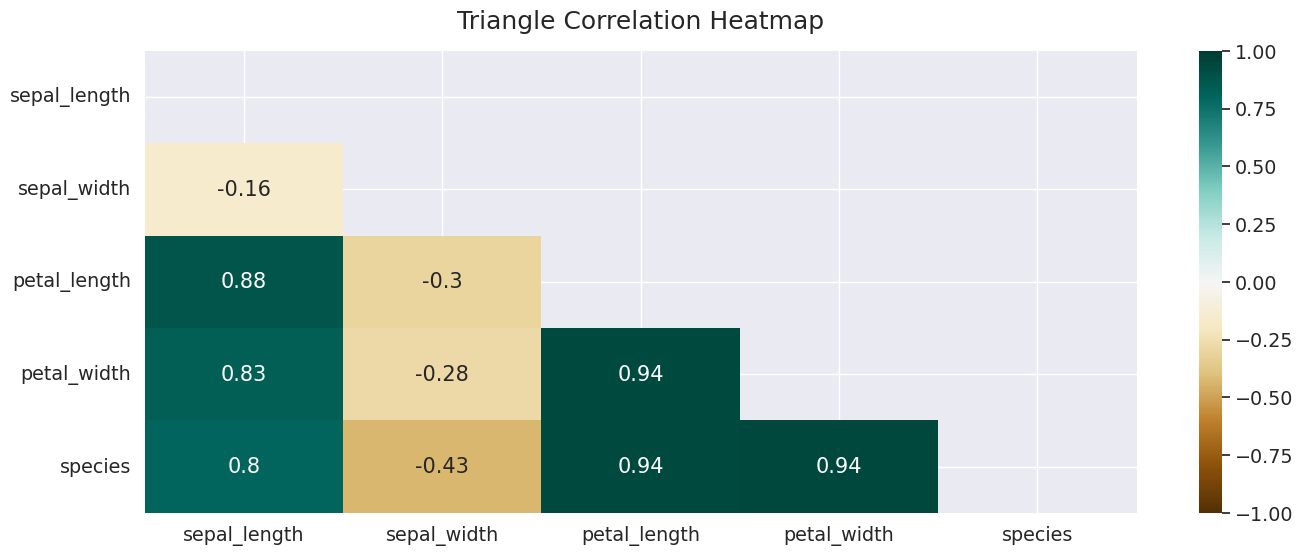

In [43]:
plt.figure (figsize = (16 , 6))

mask = np.triu(np.ones_like(df.corr(method = "spearman") , dtype = bool))
heatmap = sns.heatmap(df.corr(method = "spearman") , mask = mask , vmin = -1 , vmax = 1 ,
                      annot = True , cmap="BrBG")
heatmap.set_title("Triangle Correlation Heatmap" , fontdict = {'fontsize': 18} , pad =16 )

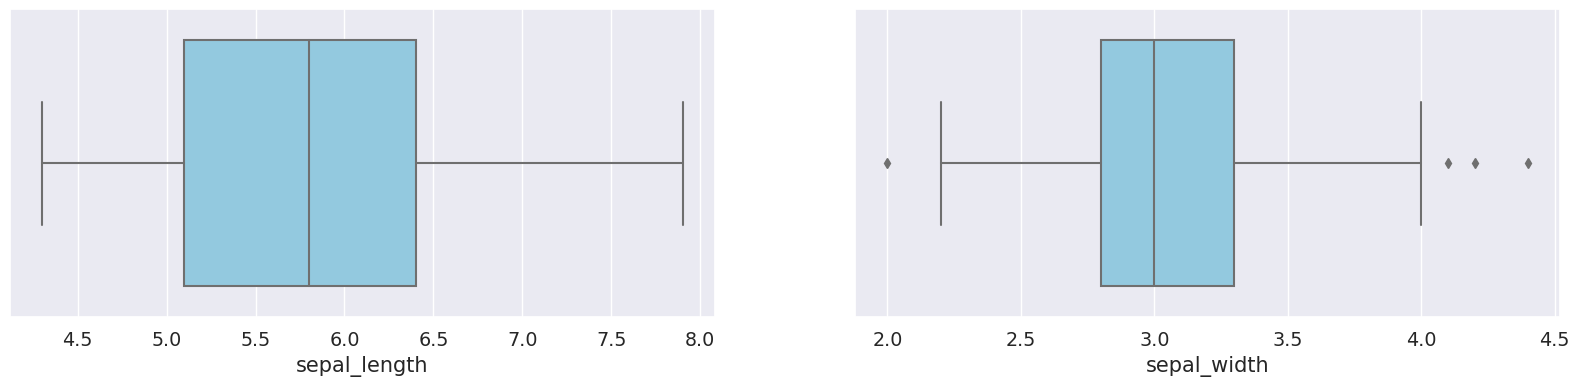

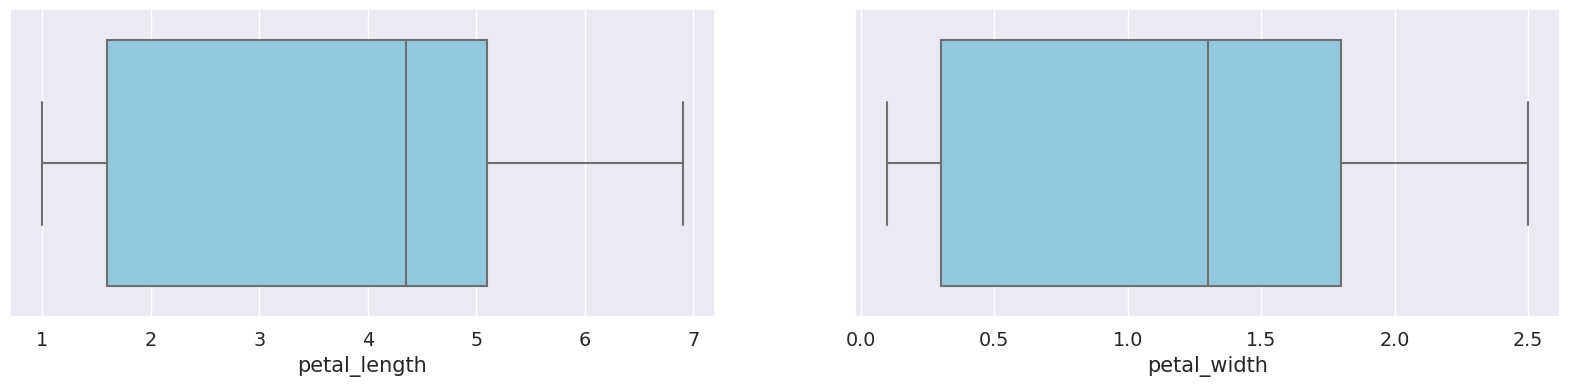

In [45]:
Num = ['sepal_length' , 'sepal_width' , 'petal_length' , 'petal_width']

j = 0
while j < 5:
    fig = plt.figure (figsize = [20 , 4])
    plt.subplot(1, 2, 1)
    sns.boxplot (x = Num[j] , data = df , color='skyblue')
    sns.set(font_scale=1.25)
    j += 1
    plt.subplot(1, 2, 2)
    sns.boxplot (x = Num[j] , data = df , color='skyblue')
    sns.set(font_scale=1.25)
    j += 1
    if j == 4:
        break
    plt.show()

## Training & Testing KNN

In [58]:
X = pd.DataFrame(df , columns = ["sepal_length" , "sepal_width" , "petal_length" , "petal_width"])
y = df["species"].values.reshape(-1,1)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3 , random_state = 0)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

KNN Classifier Accuracy: 97.77777777777777


Text(37.25, 0.5, 'Truth')

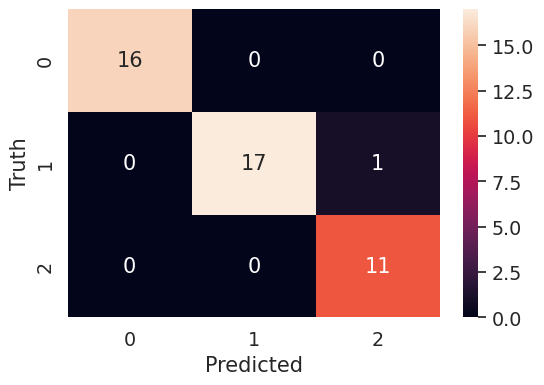

In [69]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))
knn_accuracy = accuracy_score(y_test, y_pred)
print("KNN Classifier Accuracy:", knn_accuracy*100)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

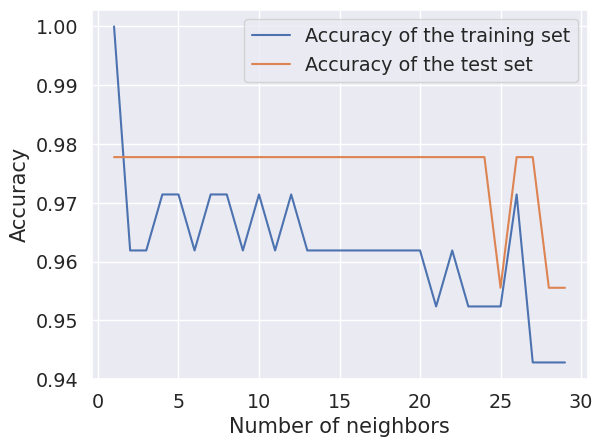

In [63]:
training_acc = []
test_acc = []

neighbors_setting = range(1,30)

for n_neighbors in neighbors_setting:
    KNN = KNeighborsClassifier(n_neighbors = n_neighbors)
    KNN.fit(X_train , y_train.ravel())
    training_acc.append(KNN.score(X_train , y_train))
    test_acc.append(KNN.score(X_test , y_test))

plt.plot(neighbors_setting , training_acc , label = "Accuracy of the training set")
plt.plot(neighbors_setting , test_acc , label = "Accuracy of the test set")
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.grid(linestyle='-')
plt.legend()

## Predicting

In [68]:
# Enter : PetalLengthCm, PetalWidthCm, SepalLengthCm, SepalWidthCm
# Iris-setosa ---> 0
# Iris-versicolor  -----> 1
# Iris-virginica -------> 2
sample_check=[[5.8,2.7,3.9,1.2],
              [7.7,2.8,6.7,2],
              [7.9,3.8,6.4,2],
              [5,3.4,1.5,0.2],
              [4.8,3.4,1.9,0.2],
              [5.1,3.5,1.4,0.2]
             ]
for i in sample_check:
    x=knn.predict([i])
    if(x==0):
        print("Iris-setosa")
    elif(x==1):
        print("Iris-versicolor")
    elif(x==2):
        print("Iris-virginica")

Iris-versicolor
Iris-virginica
Iris-virginica
Iris-setosa
Iris-setosa
Iris-setosa
